# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
# Start your codes here!

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the dataset
data = pd.read_csv('/content/drive/My Drive/DevC Data Science/Bài tập/Assignments Week 4/data/02-google-play-store/google-play-store.csv')

# Show first 5 rows of dataset
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [18]:
#Data Cleaning
# Installs number
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))

#Size
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

#reviews
data['Reviews'] = data['Reviews'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Reviews'] = data['Reviews'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
data['Reviews'] = data['Reviews'].apply(lambda x: float(x))

#Price
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: str(x).replace('Everyone', '0') if 'Everyone' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: float(x))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


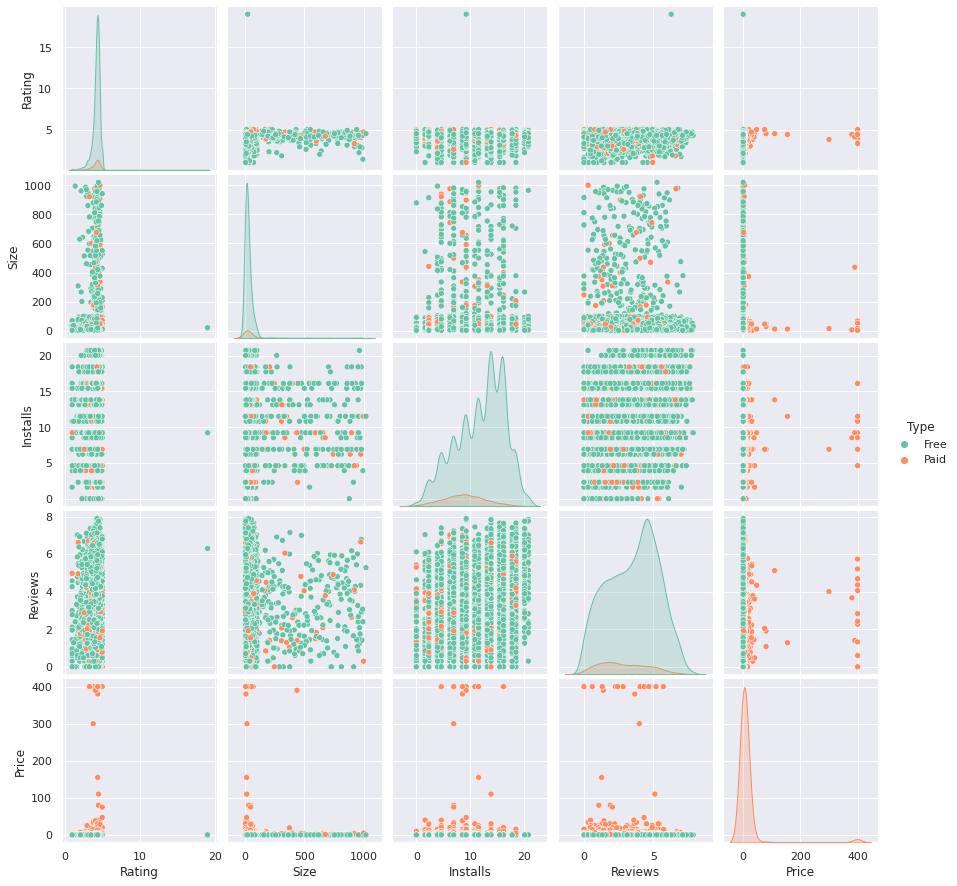

In [19]:
x = data['Rating'].dropna()
y = data['Size'].dropna()
z = data['Installs'][data.Installs!=0].dropna()
p = pd.to_numeric(data['Reviews'][data.Reviews!=0].dropna(), errors='coerce')
t = data['Type'].dropna()
price = data['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

In [20]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [21]:
number_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)
number_of_apps_in_category

1.9                       1
BEAUTY                   53
PARENTING                60
COMICS                   60
EVENTS                   64
ART_AND_DESIGN           65
WEATHER                  82
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
HOUSE_AND_HOME           88
FOOD_AND_DRINK          127
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           149
EDUCATION               156
VIDEO_PLAYERS           175
BOOKS_AND_REFERENCE     231
DATING                  234
TRAVEL_AND_LOCAL        258
SHOPPING                260
NEWS_AND_MAGAZINES      283
SOCIAL                  295
PHOTOGRAPHY             335
HEALTH_AND_FITNESS      341
FINANCE                 366
LIFESTYLE               382
SPORTS                  384
COMMUNICATION           387
PERSONALIZATION         392
PRODUCTIVITY            424
BUSINESS                460
MEDICAL                 463
TOOLS                   843
GAME                   1144
FAMILY                 1972
Name: Category, dtype: int64

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=number_of_apps_in_category.index, values=number_of_apps_in_category.values)])
fig.show()

In [ ]:
# Ta có thể tháy là Family và Game là 2 Category nổi bật nhất đi cùng với đó là Tools và Medical

In [23]:
fig =go.Figure(data=[go.Histogram(x = data.Rating,xbins = {'start': 1, 'size': 0.1, 'end' :5})])
fig.show()

In [ ]:
#Từ đây ta có thể thấy rating của app đang có rating nằm ở khoảng là 4.4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



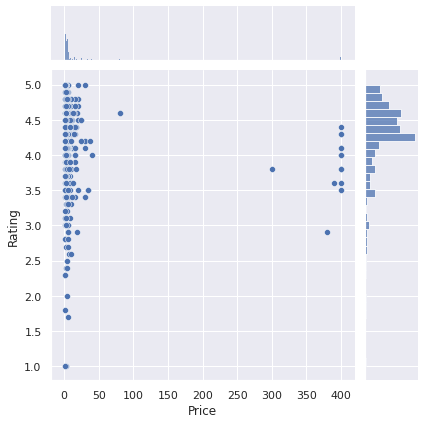

In [26]:
paid_apps = data[data.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

In [ ]:
#Most top rated apps are optimally priced between ~1$ to ~30$. There are only a very few apps priced above 20$.

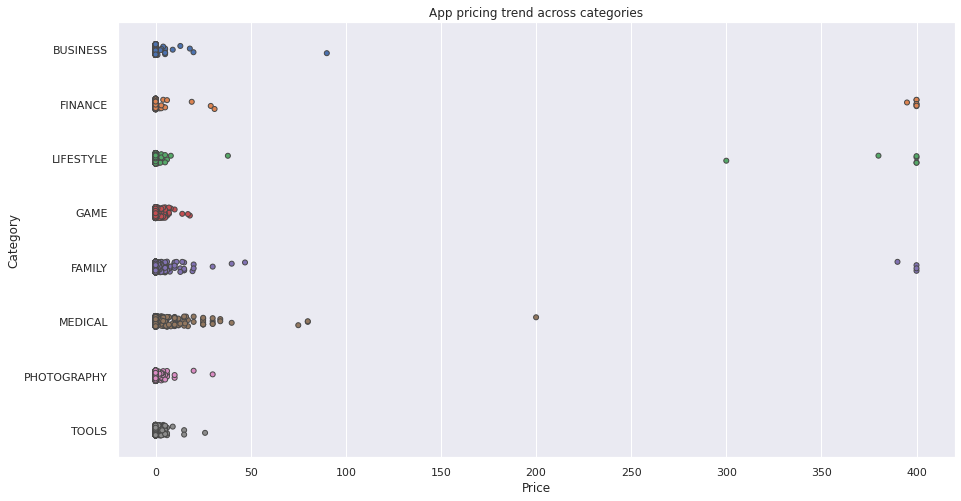

In [27]:
#Trending price
subset_df = data[data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

In [28]:
#print('Junk apps priced above 200$')
data[['Category', 'App']][data.Price > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


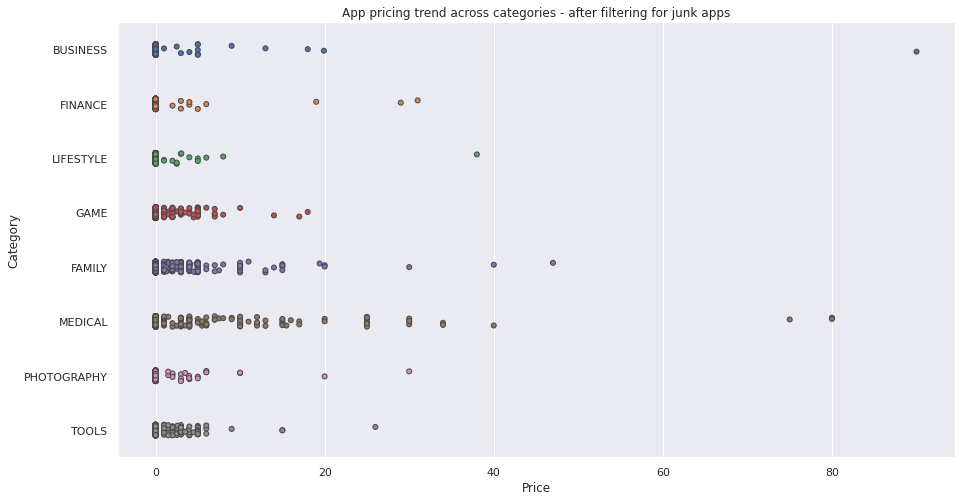

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<200]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

In [ ]:
# Medical and Family apps are the most expensive.
# All other apps are priced under 30$.
# all game apps are priced below 20$